# Marketing Text Classification

### The Data


This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from
HuffPost
. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.

Each news headline has a corresponding category. Categories and corresponding article counts are as follows:

POLITICS: 32739

WELLNESS: 17827

ENTERTAINMENT: 16058

TRAVEL: 9887

STYLE & BEAUTY: 9649

PARENTING: 8677

HEALTHY LIVING: 6694

QUEER VOICES: 6314

FOOD & DRINK: 6226

BUSINESS: 5937

COMEDY: 5175

SPORTS: 4884

BLACK VOICES: 4528

HOME & LIVING: 4195

PARENTS: 3955

THE WORLDPOST: 3664

WEDDINGS: 3651

WOMEN: 3490

IMPACT: 3459

DIVORCE: 3426

CRIME: 3405

MEDIA: 2815

WEIRD NEWS: 2670

GREEN: 2622

WORLDPOST: 2579

RELIGION: 2556

STYLE: 2254

SCIENCE: 2178

WORLD NEWS: 2177

TASTE: 2096

TECH: 2082

MONEY: 1707

ARTS: 1509

FIFTY: 1401

GOOD NEWS: 1398

ARTS & CULTURE: 1339

ENVIRONMENT: 1323

COLLEGE: 1144

LATINO VOICES: 1129

CULTURE & ARTS: 1030

EDUCATION: 1004



### Libraries


In [ ]:
!pip install tensorflow==2.10.0 keras==2.10.0 ktrain==0.31.7

In [36]:
# import tf, keras, and ktrain with versions
try:
    import tensorflow
except:
    !pip install tensorflow==2.10.0
    os.kill(os.getpid(), 9)
try:
    import keras
except:
    !pip install keras==2.10.0
    os.kill(os.getpid(), 9)
try:
    import ktrain
except:
    !pip install ktrain==0.31.7
    os.kill(os.getpid(), 9)

import keras

In [37]:
# Import all necessary libraries

# File Connection and File Manipulation
import os
import time
import pickle
import json
import glob
import random as rn
from random import randint


# Basic Data Science Toolkits
import pandas as pd
import numpy as np
import math

# Basic Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Word cloud for health and wellness categories
from wordcloud import WordCloud

# Import Data Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Import Ktrain
import ktrain
from ktrain import text
from ktrain.text import texts_from_df
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# NLP Text Cleanup
import re
import nltk
from nltk.corpus import stopwords

# NLP Tokenizer and Lemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import digits

In [38]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Verify GPU Runtime

In [39]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Aug 19 19:10:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              43W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load Dataset

In [41]:
# Load the dataset
df = pd.read_json('drive/MyDrive/Final/news_category_trainingdata.json')

# Create binary labels for health and wellness content
health_categories = ['WELLNESS', 'HEALTHY LIVING']
df['is_health'] = df['category'].isin(health_categories).astype(int)

## EDA

#### Inspect the data

In [42]:
# Display basic information about the dataset
print(df.info())
print(df.head())

# Check class distribution
print(df['category'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 200853 entries, 0 to 200852
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
 6   is_health          200853 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 12.3+ MB
None
        category                                           headline  \
0          CRIME  There Were 2 Mass Shootings In Texas Last Week...   
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Bla

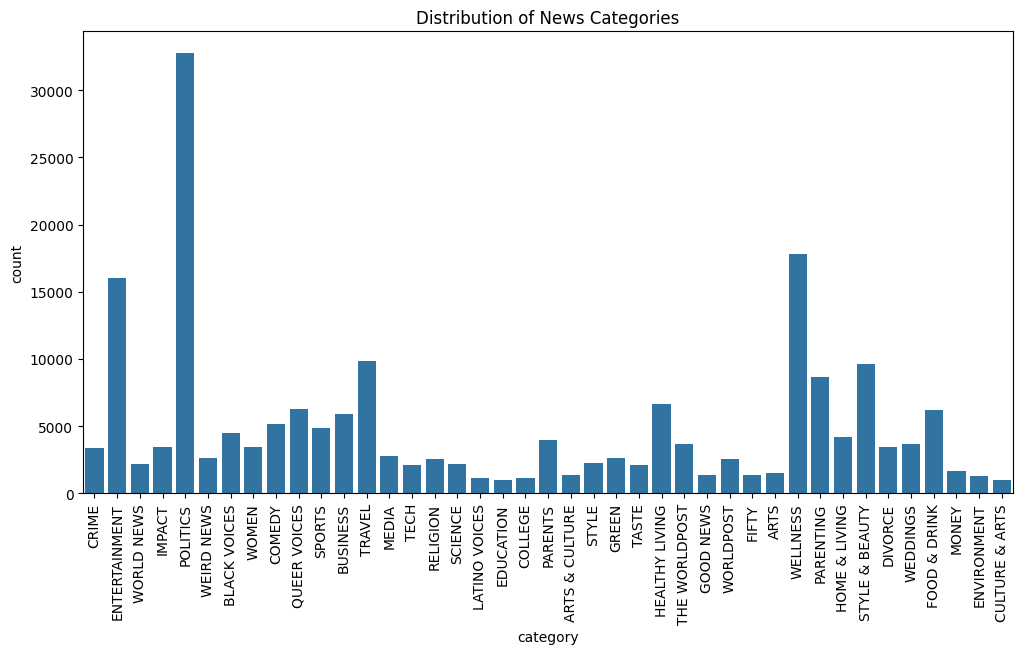

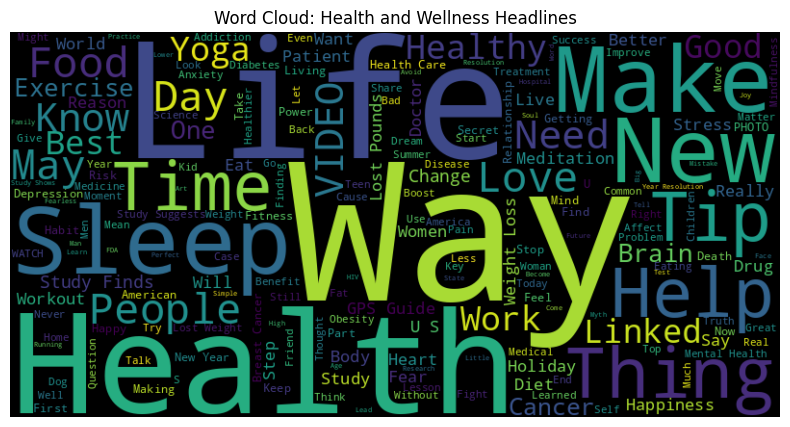

In [43]:
# Visualize class distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of News Categories')
plt.show()


health_df = df[df['category'].isin(['WELLNESS', 'HEALTHY LIVING'])]
text = ' '.join(health_df['headline'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Health and Wellness Headlines')
plt.show()



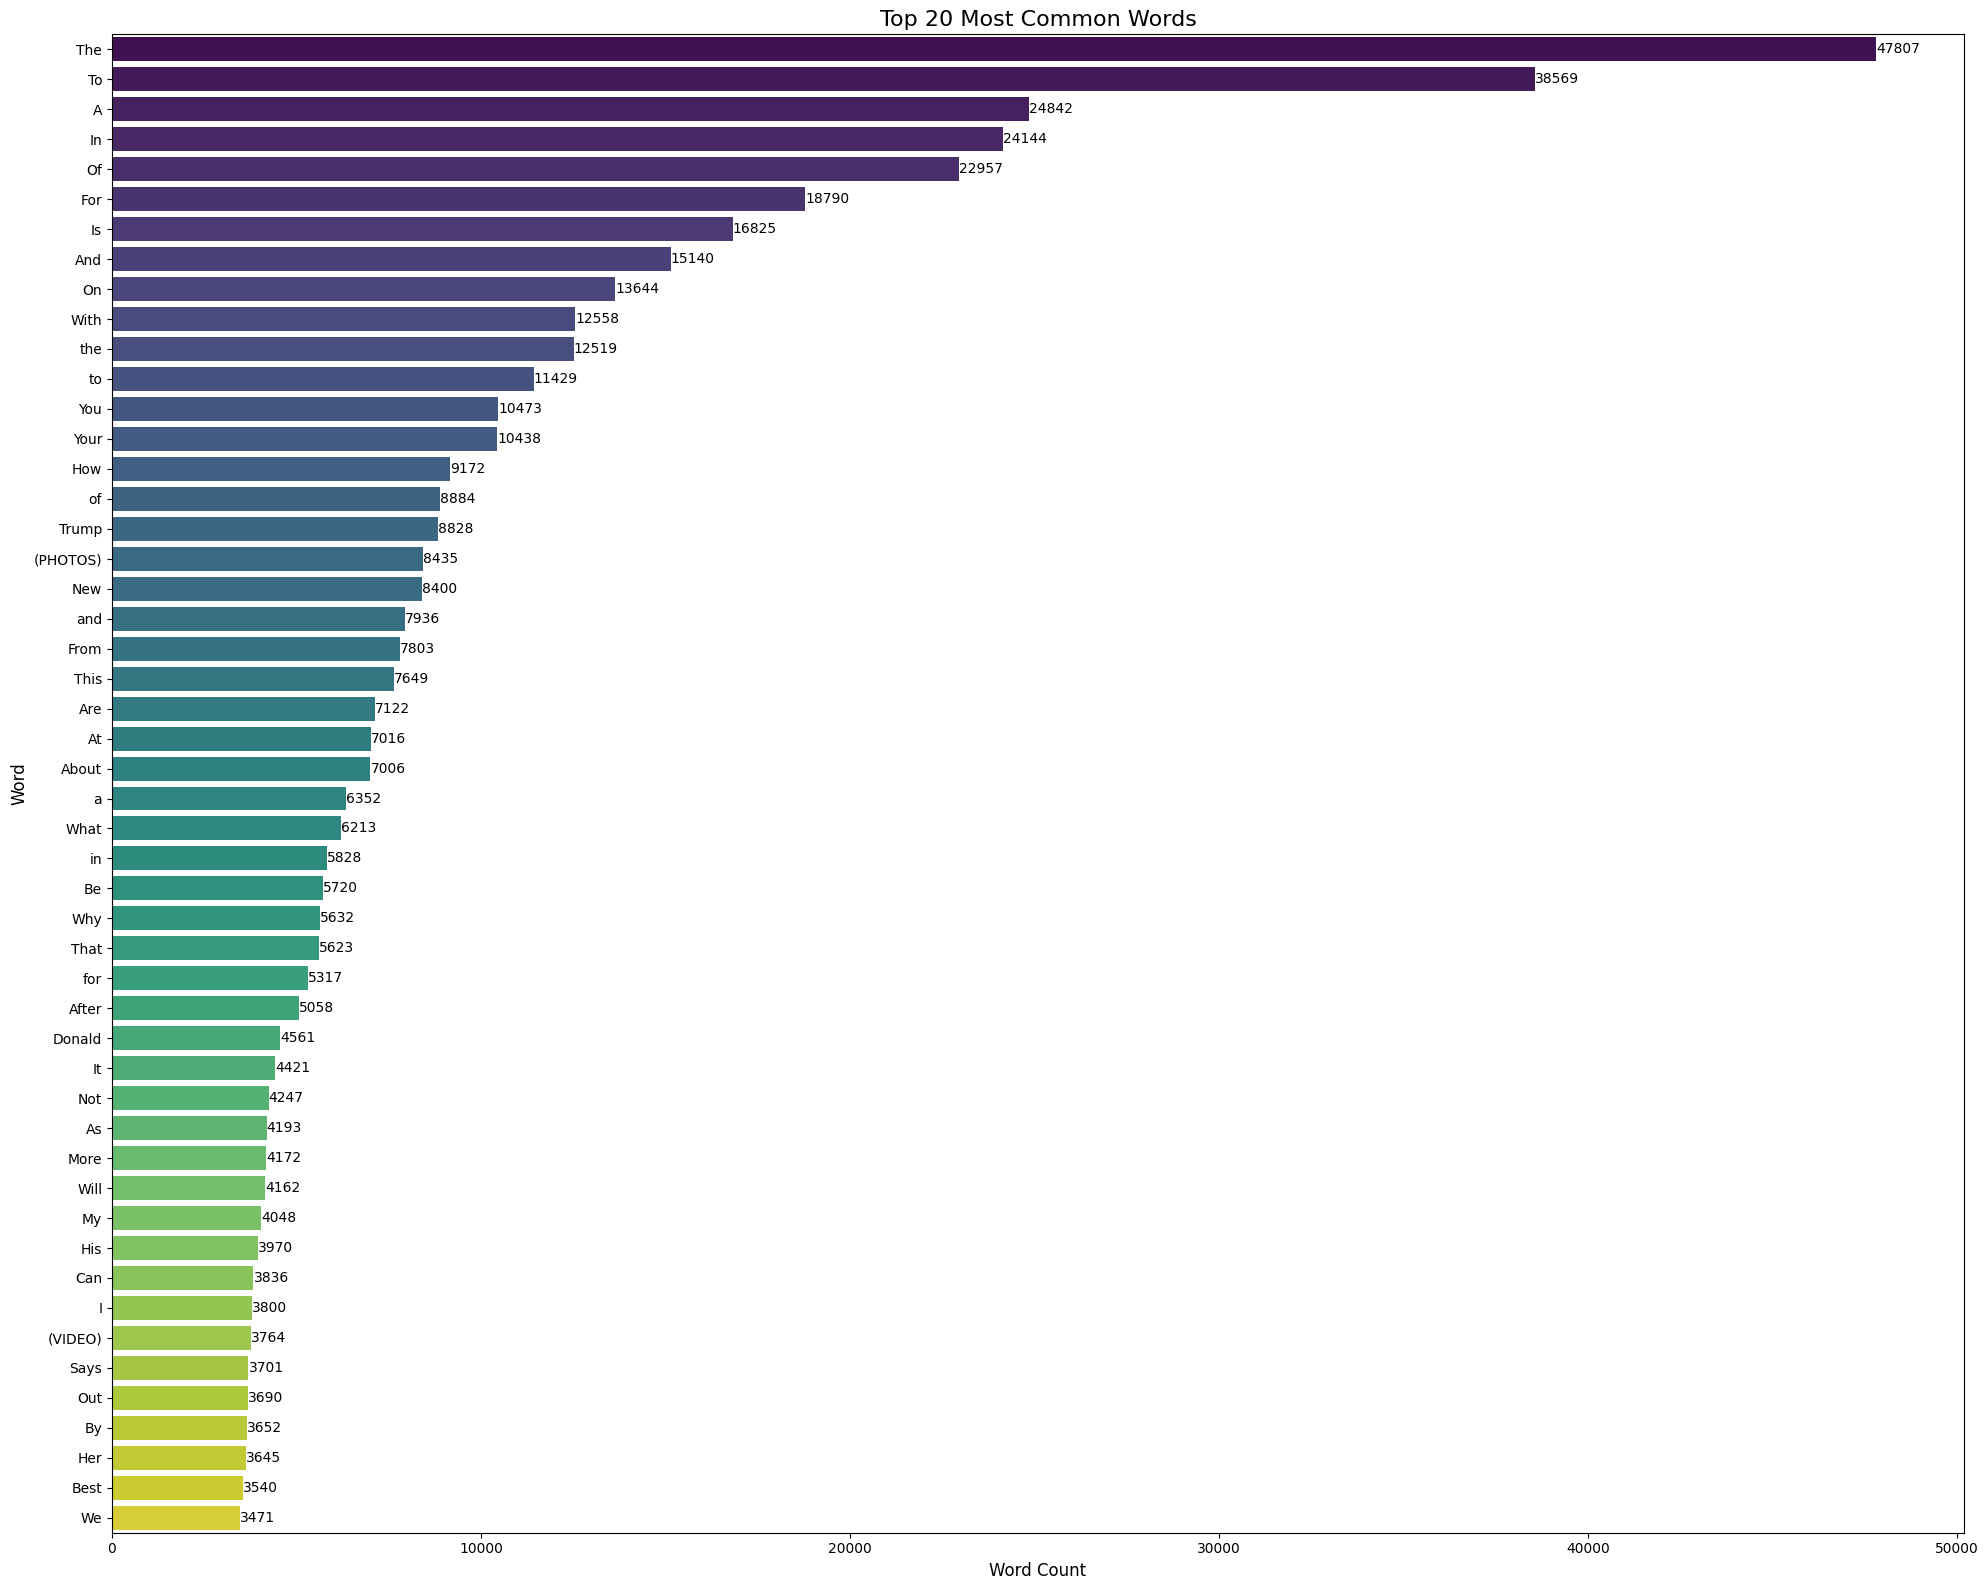

In [44]:
from collections import Counter

# get word counts
word_counts = Counter()
for headline in df['headline']:
    word_counts.update(headline.split())

# Create a DataFrame of the top 20 most common words
df_word_counts = pd.DataFrame(word_counts.most_common(50), columns=['word', 'count'])

# Create the plot
plt.figure(figsize=(20, 16))
sns.barplot(x='count', y='word', data=df_word_counts, palette='viridis')

# Customize the plot
plt.title('Top 20 Most Common Words', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Word', fontsize=12)

# Add count labels to the end of each bar
for i, v in enumerate(df_word_counts['count']):
    plt.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()

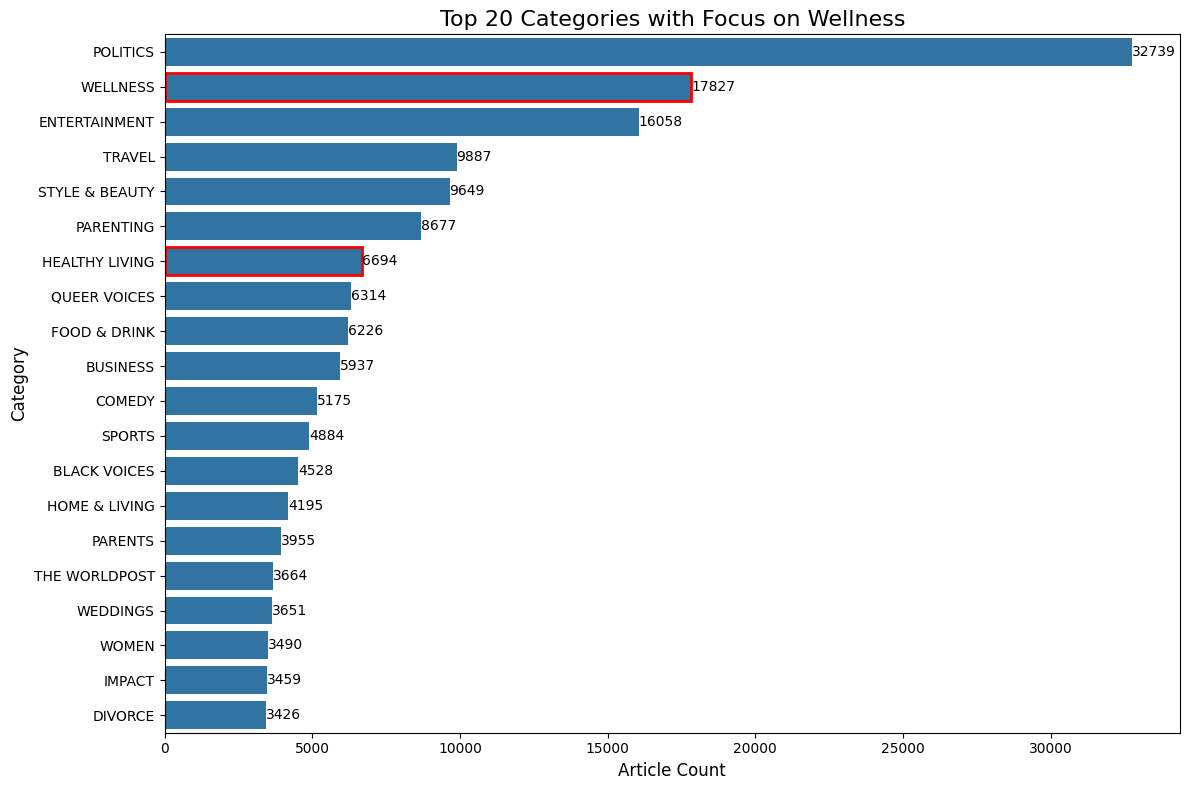

In [45]:

df_cat_count = pd.DataFrame(df['category'].value_counts()).reset_index()

df_cat_count = df_cat_count.head(20)  # Focus on top 20 categories

# Create a new column for color coding
df_cat_count['color'] = df_cat_count['category'].apply(lambda x: 'orange' if x in ['WELLNESS', 'HEALTHY LIVING'] else 'lightgrey')

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='category', data=df_cat_count)
# Customize the plot
plt.title('Top 20 Categories with Focus on Wellness', fontsize=16)
plt.xlabel('Article Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Add count labels to the end of each bar
for i, v in enumerate(df_cat_count['count']):
    plt.text(v + 0.5, i, str(v), va='center')

# Highlight Wellness categories with a box
wellness_categories = df_cat_count[df_cat_count['color'] == 'orange']
for i, row in wellness_categories.iterrows():
    plt.gca().add_patch(plt.Rectangle((0, i-0.4), row['count'], 0.8, fill=False, edgecolor='red', lw=2))

plt.tight_layout()
plt.show()



## Data Preprocessing

In [46]:
# Check for missing values
print(df.isnull().sum())

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
is_health            0
dtype: int64


#### Clean Text

In [47]:
# Remove any missing values
df.dropna(inplace=True)

# Combine 'headline' and 'short_description' for more context
df['combined_text'] = df['headline'] + ' ' + df['short_description']

# Create binary labels for health and wellness content
health_categories = ['WELLNESS', 'HEALTHY LIVING']
df['wellness'] = np.where((df['category'].isin(health_categories)), 1, 0)

# Clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['headline'] = df['headline'].apply(clean_text)


df['combined_text'] = df['combined_text'].apply(clean_text)

# Display the first few rows of the processed data
print(df[['headline', 'is_health']].head())

print(df[['combined_text', 'is_health']].head())

                                            headline  is_health
0  there were mass shootings in texas last week b...          0
1  will smith joins diplo and nicky jam for the w...          0
2      hugh grant marries for the first time at age           0
3  jim carrey blasts castrato adam schiff and dem...          0
4  julianna margulies uses donald trump poop bags...          0
                                       combined_text  is_health
0  there were mass shootings in texas last week b...          0
1  will smith joins diplo and nicky jam for the w...          0
2  hugh grant marries for the first time at age t...          0
3  jim carrey blasts castrato adam schiff and dem...          0
4  julianna margulies uses donald trump poop bags...          0


In [48]:
import random

# Set a random seed for reproducibility
#random.seed(42)
# show the content of one Article in the data source
id = random.randint(0, len(df))

print('id:', id, '\n')
print('is_health:', df['is_health'][id], '\n')
print('category:', df['category'][id], '\t wellness:', df['wellness'][id],'\n')
print('headline:', df['headline'][id], '\n')
print('short_description:', df['short_description'][id], '\n')
print('combined_text:', df['combined_text'][id], '\n')

id: 120778 

is_health: 0 

category: COMEDY 	 wellness: 0 

headline: this is how you fold a fitted sheet kind of 

short_description:  

combined_text: this is how you fold a fitted sheet kind of  



In [49]:
# NLP Tokenization and Lemmatization

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

#df['combined_text'] = df['combined_text'].apply(preprocess_text)

### Sampling and Balancing

In [50]:
def create_balanced_sample(df, target_column, positive_class, sample_size, text_column, random_state=42):
    """
    Create a balanced sample from an imbalanced dataset.

    :param df: Input DataFrame
    :param target_column: Name of the target column
    :param positive_class: Value representing the positive class in the target column
    :param sample_size: Desired size of each class in the final sample
    :param text_column: Name of the column containing the text data
    :param random_state: Random state for reproducibility
    :return: Balanced sampled DataFrame
    """
    # Separate positive and negative samples
    positive_samples = df[df[target_column] == positive_class]
    negative_samples = df[df[target_column] != positive_class]

    # Sample positive class
    if len(positive_samples) >= sample_size:
        positive_sampled = positive_samples.sample(n=sample_size, random_state=random_state)
    else:
        positive_sampled = positive_samples.sample(n=sample_size, replace=True, random_state=random_state)

    # Calculate sampling fraction for negative class
    negative_sample_frac = min(1.0, sample_size / len(negative_samples))

    # Sample negative class while preserving category distribution
    negative_sampled = negative_samples.groupby('category').apply(
        lambda x: x.sample(frac=negative_sample_frac, replace=False, random_state=random_state)
    ).reset_index(drop=True)

    # If we still don't have enough negative samples, oversample to reach the desired size
    if len(negative_sampled) < sample_size:
        negative_sampled = negative_sampled.sample(n=sample_size, replace=True, random_state=random_state)

    # Combine and shuffle the samples
    balanced_sample = pd.concat([positive_sampled, negative_sampled])
    balanced_sample = shuffle(balanced_sample, random_state=random_state).reset_index(drop=True)

    return balanced_sample

# Set parameters
sample_size = 2000
target_column = 'is_health'
positive_class = 1
text_column = 'combined_text'
random_state = 42

# Create balanced sample
df_sample = create_balanced_sample(df, target_column, positive_class, sample_size, text_column, random_state)

# Preview the Split of Data
print(df_sample[target_column].value_counts(), '\n')

# Confirm all categories are represented
sample_cat_list = list(df_sample['category'].unique())
total_sample_cats = len(sample_cat_list)
print('Sample Categories:', total_sample_cats, '\n\tList:', sample_cat_list)


is_health
0    2001
1    2000
Name: count, dtype: int64 

Sample Categories: 41 
	List: ['WELLNESS', 'MONEY', 'WEDDINGS', 'POLITICS', 'HEALTHY LIVING', 'FOOD & DRINK', 'LATINO VOICES', 'BUSINESS', 'GREEN', 'SPORTS', 'WEIRD NEWS', 'IMPACT', 'PARENTING', 'STYLE', 'ENTERTAINMENT', 'TRAVEL', 'EDUCATION', 'QUEER VOICES', 'DIVORCE', 'STYLE & BEAUTY', 'TECH', 'WORLD NEWS', 'COMEDY', 'TASTE', 'RELIGION', 'WORLDPOST', 'PARENTS', 'BLACK VOICES', 'COLLEGE', 'SCIENCE', 'THE WORLDPOST', 'WOMEN', 'HOME & LIVING', 'MEDIA', 'ARTS & CULTURE', 'ENVIRONMENT', 'CRIME', 'FIFTY', 'GOOD NEWS', 'CULTURE & ARTS', 'ARTS']


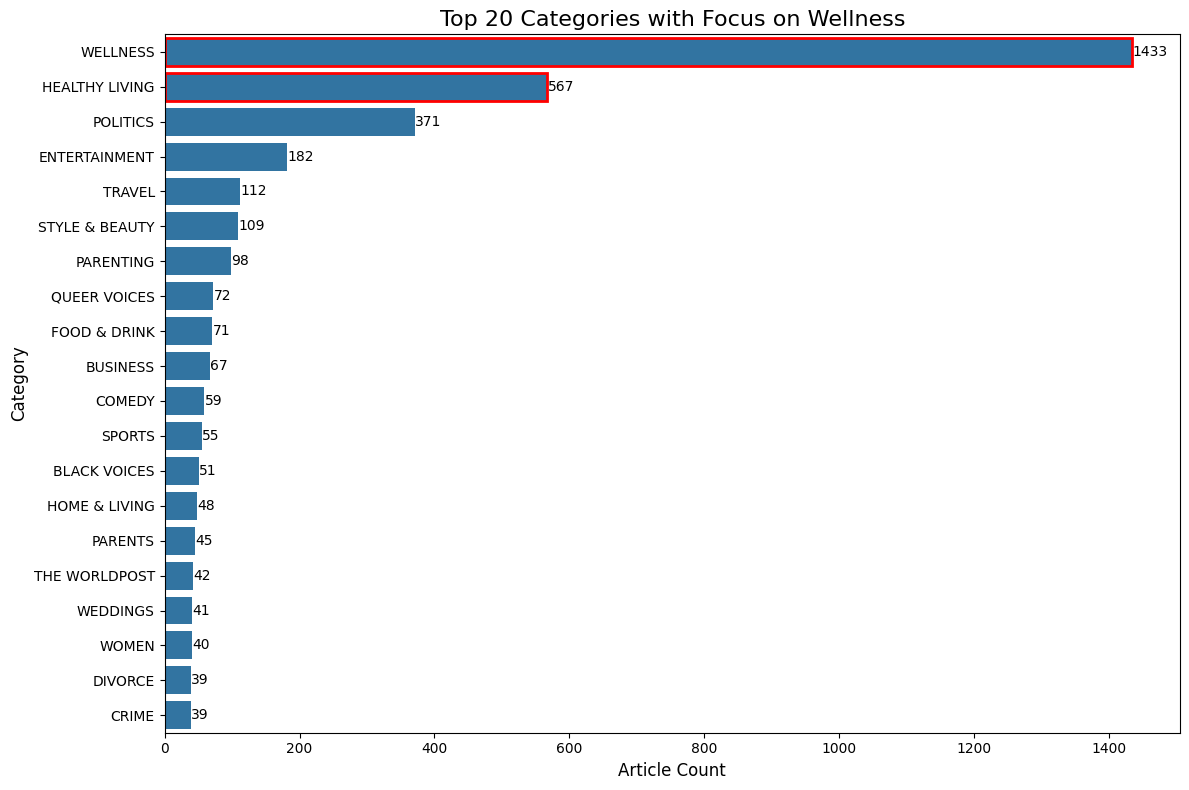

In [51]:
# Visualize category distribution

df_cat_count = pd.DataFrame(df_sample['category'].value_counts()).reset_index()

df_cat_count = df_cat_count.head(20)  # Focus on top 20 categories

# Create a new column for color coding
df_cat_count['color'] = df_cat_count['category'].apply(lambda x: 'orange' if x in ['WELLNESS', 'HEALTHY LIVING'] else 'lightgrey')

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='category', data=df_cat_count)
# Customize the plot
plt.title('Top 20 Categories with Focus on Wellness', fontsize=16)
plt.xlabel('Article Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Add count labels to the end of each bar
for i, v in enumerate(df_cat_count['count']):
    plt.text(v + 0.5, i, str(v), va='center')

# Highlight Wellness categories with a box
wellness_categories = df_cat_count[df_cat_count['color'] == 'orange']
for i, row in wellness_categories.iterrows():
    plt.gca().add_patch(plt.Rectangle((0, i-0.4), row['count'], 0.8, fill=False, edgecolor='red', lw=2))

plt.tight_layout()
plt.show()

## Prepare data for Deep Learning

### Create preprocessed data

In [52]:
train, val, preprocess = ktrain.text.texts_from_df(
    df_sample,
    "combined_text",
    label_columns=["is_health"],
    val_df=None,
    max_features=20000,
    maxlen=512,
    val_pct=0.1,
    ngram_range=1,
    preprocess_mode="distilbert",
    verbose=1
)

['not_is_health', 'is_health']
      not_is_health  is_health
102             1.0        0.0
3842            1.0        0.0
2397            0.0        1.0
16              0.0        1.0
452             1.0        0.0
['not_is_health', 'is_health']
      not_is_health  is_health
3631            0.0        1.0
1168            0.0        1.0
57              0.0        1.0
3831            0.0        1.0
1130            1.0        0.0
preprocessing train...
language: en
train sequence lengths:
	mean : 31
	95percentile : 56
	99percentile : 65


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 72


### Hyperparameter Tuning : Learning Rate


In [53]:
# create a classifier model
model = preprocess.get_classifier()

['not_is_health', 'is_health']
      not_is_health  is_health
3162            1.0        0.0
609             0.0        1.0
1435            0.0        1.0
3005            1.0        0.0
937             1.0        0.0
['not_is_health', 'is_health']
      not_is_health  is_health
810             1.0        0.0
570             1.0        0.0
1242            1.0        0.0
1393            1.0        0.0
2152            1.0        0.0
preprocessing train...
language: en
train sequence lengths:
	mean : 31
	95percentile : 56
	99percentile : 65


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 64


simulating training for different learning rates... this may take a few moments...
Epoch 1/2
225/225 [==============================] - 1222s 5s/step - loss: 0.5704 - accuracy: 0.7058
Epoch 2/2
225/225 [==============================] - 1217s 5s/step - loss: 0.9363 - accuracy: 0.5181


done.
Visually inspect loss plot and select learning rate associated with falling loss


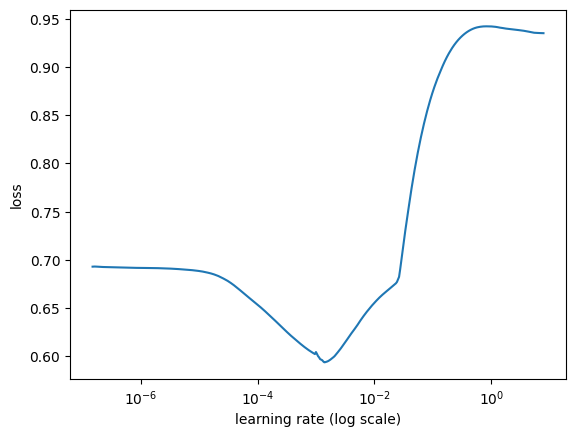

Batch size: 16
Min gradient: 2.81e-04
Steepest point: 1.39e-04
Longest valley: 1.36e-05
---
['not_is_health', 'is_health']
      not_is_health  is_health
1636            0.0        1.0
176             1.0        0.0
1184            0.0        1.0
2020            1.0        0.0
2158            1.0        0.0
['not_is_health', 'is_health']
      not_is_health  is_health
2563            1.0        0.0
1448            0.0        1.0
1251            0.0        1.0
171             0.0        1.0
2922            1.0        0.0
preprocessing train...
language: en
train sequence lengths:
	mean : 31
	95percentile : 56
	99percentile : 65


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 32
	95percentile : 58
	99percentile : 64


simulating training for different learning rates... this may take a few moments...
Epoch 1/2
112/112 [==============================] - 1193s 11s/step - loss: 0.6049 - accuracy: 0.6568
Epoch 2/2
112/112 [==============================] - 601s 5s/step - loss: 20.3585 - accuracy: 0.4972


done.
Visually inspect loss plot and select learning rate associated with falling loss


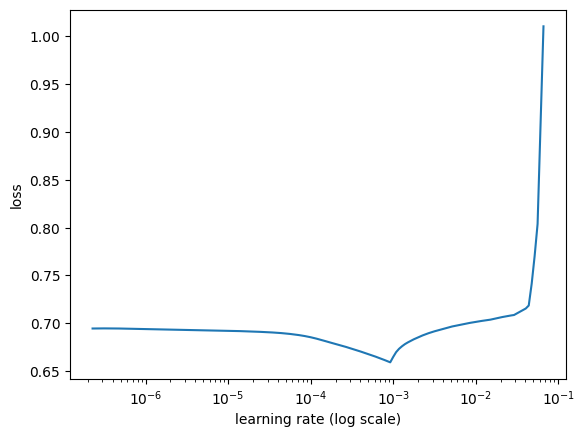

Batch size: 32
Min gradient: 6.11e-05
Steepest point: 9.21e-05
Longest valley: 1.09e-05
---
['not_is_health', 'is_health']
      not_is_health  is_health
654             1.0        0.0
1461            1.0        0.0
2429            0.0        1.0
3625            0.0        1.0
2725            0.0        1.0
['not_is_health', 'is_health']
      not_is_health  is_health
2082            1.0        0.0
3692            1.0        0.0
659             1.0        0.0
2336            1.0        0.0
3317            0.0        1.0
preprocessing train...
language: en
train sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 65


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 32
	95percentile : 55
	99percentile : 65


simulating training for different learning rates... this may take a few moments...
Epoch 1/2
56/56 [==============================] - 1176s 21s/step - loss: 0.6506 - accuracy: 0.6233
Epoch 2/2
56/56 [==============================] - 844s 15s/step - loss: 4.5485 - accuracy: 0.5198


done.
Visually inspect loss plot and select learning rate associated with falling loss


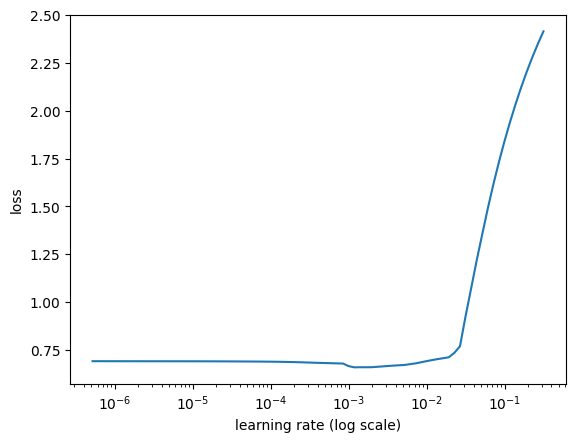

Batch size: 64
Min gradient: 5.18e-06
Steepest point: 1.18e-04
Longest valley: 2.28e-05
---
['not_is_health', 'is_health']
      not_is_health  is_health
337             0.0        1.0
3918            1.0        0.0
38              1.0        0.0
2619            0.0        1.0
3031            0.0        1.0
['not_is_health', 'is_health']
      not_is_health  is_health
1334            0.0        1.0
473             1.0        0.0
53              1.0        0.0
2553            0.0        1.0
1624            0.0        1.0
preprocessing train...
language: en
train sequence lengths:
	mean : 31
	95percentile : 56
	99percentile : 65


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 32
	95percentile : 58
	99percentile : 66


simulating training for different learning rates... this may take a few moments...
Epoch 1/2
28/28 [==============================] - 1166s 41s/step - loss: 0.6636 - accuracy: 0.5965
Epoch 2/2
28/28 [==============================] - 545s 20s/step - loss: 32.7790 - accuracy: 0.5173


/usr/local/lib/python3.10/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Visually inspect loss plot and select learning rate associated with falling loss


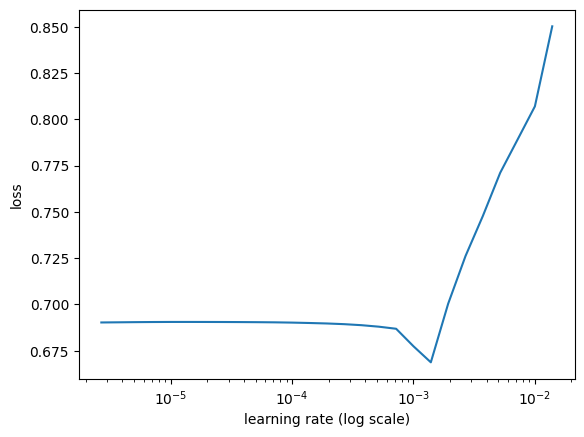

Batch size: 128


TypeError: unsupported format string passed to NoneType.__format__

In [23]:
batch_sizes = [16, 32, 64]
lr_results = {}
learners = {}

for bs in batch_sizes:
    # Reprocess the data with the new batch size
    trn, val, preproc = ktrain.text.texts_from_df(
        df_sample,
        "combined_text",
        label_columns=["is_health"],
        val_df=None,
        max_features=20000,
        maxlen=512,
        val_pct=0.1,
        ngram_range=1,
        preprocess_mode="distilbert",
        verbose=1
)
    # Create a new learner
    learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=bs)
    learners[bs] = learner

    # Run lr_find for the current batch size
    learner.lr_find(show_plot=True, max_epochs=2)

    # Get the learning rate estimates
    lr_min, lr_steep, lr_valley = learner.lr_estimate()

    # Store the results in the dictionary
    lr_results[bs] = {
        'lr_min': lr_min,
        'lr_steep': lr_steep,
        'lr_valley': lr_valley
    }

    print(f"Batch size: {bs}")
    print(f"Min gradient: {lr_min:.2e}")
    print(f"Steepest point: {lr_steep:.2e}")
    print(f"Longest valley: {lr_valley:.2e}")
    print("---")

# Now you can access the results later
for bs, lr_values in lr_results.items():
    print(f"Batch size: {bs}")
    print(f"Min gradient: {lr_values['lr_min']:.2e}")
    print(f"Steepest point: {lr_values['lr_steep']:.2e}")
    print(f"Longest valley: {lr_values['lr_valley']:.2e}")
    print("---")


In [54]:
lr_results = {
    16: {'lr_min': 2.81e-04, 'lr_steep': 1.39e-04, 'lr_valley': 1.36e-05},
    32: {'lr_min': 6.11e-05, 'lr_steep': 9.21e-05, 'lr_valley': 1.09e-05},
    64: {'lr_min': 5.18e-06, 'lr_steep': 1.18e-04, 'lr_valley': 2.28e-05}
}



*   As the batch size increases, the "steepest point" learning rate tends to increase. This is consistent with the general principle that larger batch sizes often allow for higher learning rates.
*   The "longest valley" learning rate also shows a slight increase with batch size, which is a good sign for stability.
* The "min gradient" learning rate doesn't show a clear trend with batch size in this case.



## Final Model

#### Try different learning rates

In [55]:
# Learning rate suggested from longest valley for best batch size

best_batch_size = max(lr_results, key=lambda bs: lr_results[bs]['lr_valley'])
best_lr_valley = lr_results[best_batch_size]['lr_valley']
best_learner = learners[best_batch_size]

history_valley = best_learner.autofit(
    lr = best_lr_valley,
    epochs = 2,
    early_stopping = True,
    reduce_on_plateau = True,
    reduce_factor = 0.5,
    monitor = 'val_loss',
    checkpoint_folder = f'drive/MyDrive/Final/checkpoint_lr_valley_bs_{best_batch_size}'
)

print(f"Training with batch size {best_batch_size} and learning rate {best_lr_valley:.2e}")




begin training using triangular learning rate policy with max lr of 2.28e-05...
Epoch 1/2
57/57 [==============================] - 1183s 21s/step - loss: 0.0777 - accuracy: 0.9778 - val_loss: 0.2828 - val_accuracy: 0.9177
Epoch 2/2
57/57 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9861 
Epoch 00002: Reducing Max LR on Plateau: new max lr will be 4.56e-05 (if not early_stopping).
Restoring model weights from the end of the best epoch: 1.
57/57 [==============================] - 1182s 21s/step - loss: 0.0530 - accuracy: 0.9861 - val_loss: 0.3236 - val_accuracy: 0.8953
Epoch 2: early stopping
Weights from best epoch have been loaded into model.
Training with batch size 64 and learning rate 2.28e-05


In [56]:
# Learning rate from min numerical gradient for best batch
best_batch_size_min = min(lr_results, key=lambda bs: lr_results[bs]['lr_min'])
best_lr_min = lr_results[best_batch_size_min]['lr_min']
best_learner = learners[best_batch_size]

history_gradient = best_learner.autofit(
    lr = best_lr_min,
    epochs = 2,
    early_stopping = True,
    reduce_on_plateau = True,
    reduce_factor = 0.5,
    monitor = 'val_loss',
    checkpoint_folder = f'drive/MyDrive/Final/checkpoint_lr_min_bs_{best_batch_size_min}'
)

print(f"Training with batch size {best_batch_size_min} and learning rate {best_lr_min:.2e}")






begin training using triangular learning rate policy with max lr of 5.18e-06...
Epoch 1/2
57/57 [==============================] - 1188s 21s/step - loss: 0.0539 - accuracy: 0.9872 - val_loss: 0.2804 - val_accuracy: 0.9127
Epoch 2/2
57/57 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9903 
Epoch 00002: Reducing Max LR on Plateau: new max lr will be 1.036e-05 (if not early_stopping).
Restoring model weights from the end of the best epoch: 1.
57/57 [==============================] - 1190s 21s/step - loss: 0.0447 - accuracy: 0.9903 - val_loss: 0.3051 - val_accuracy: 0.9052
Epoch 2: early stopping
Weights from best epoch have been loaded into model.
Training with batch size 64 and learning rate 5.18e-06


In [57]:
best_batch_size_steep = max(lr_results, key=lambda bs: lr_results[bs]['lr_steep'])
best_lr_steep = lr_results[best_batch_size_steep]['lr_steep']
best_learner_steep = learners[best_batch_size_steep]

history_steep = best_learner_steep.autofit(
    lr = best_lr_steep,
    epochs = 2,
    early_stopping = True,
    reduce_on_plateau = True,
    reduce_factor = 0.5,
    monitor = 'val_loss',
    checkpoint_folder = f'drive/MyDrive/Final/checkpoint_lr_steep_bs_{best_batch_size_steep}'
)

print(f"Training with batch size {best_batch_size_steep} and learning rate {best_lr_steep:.2e}")




begin training using triangular learning rate policy with max lr of 0.000139...
Epoch 1/2
225/225 [==============================] - 1220s 5s/step - loss: 0.1896 - accuracy: 0.9350 - val_loss: 0.3312 - val_accuracy: 0.8803
Epoch 2/2
225/225 [==============================] - 1220s 5s/step - loss: 0.1063 - accuracy: 0.9683 - val_loss: 0.3240 - val_accuracy: 0.8753
Weights from best epoch have been loaded into model.
Training with batch size 16 and learning rate 1.39e-04


In [58]:
def get_best_learner_and_lr(lr_results, learners, lr_type):
    best_batch_size = max(lr_results, key=lambda bs: lr_results[bs][lr_type])
    best_lr = lr_results[best_batch_size][lr_type]
    best_learner = learners[best_batch_size]
    return best_learner, best_lr


In [65]:
print(lr_results)

{16: {'lr_min': 0.000281, 'lr_steep': 0.000139, 'lr_valley': 1.36e-05}, 32: {'lr_min': 6.11e-05, 'lr_steep': 9.21e-05, 'lr_valley': 1.09e-05}, 64: {'lr_min': 5.18e-06, 'lr_steep': 0.000118, 'lr_valley': 2.28e-05}}


In [68]:
results = []
lr_types = ['Valley', 'Min', 'Steep']
histories = [history_valley, history_gradient, history_steep]
best_lrs = [best_lr_valley, best_lr_min, best_lr_steep]

for lr_type, history, best_lr in zip(lr_types, histories, best_lrs):
    best_batch_size = max(lr_results, key=lambda bs: lr_results[bs][f'lr_{lr_type.lower()}'])
    current_learner = learners[best_batch_size]
    val_loss, val_accuracy = current_learner.validate()

    # Convert best_lr to float if it's a numpy array
    if isinstance(best_lr, np.ndarray):
        best_lr = float(best_lr)

    # Convert val_loss and val_accuracy to scalars if they're arrays
    if isinstance(val_loss, np.ndarray):
        val_loss = float(val_loss.mean())
    if isinstance(val_accuracy, np.ndarray):
        val_accuracy = float(val_accuracy.mean())

    results.append((lr_type, best_lr, val_loss, val_accuracy, best_batch_size))
    print(f"LR ({lr_type}): {best_lr}, Batch Size: {best_batch_size}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Sort results by validation loss (lower is better)
results.sort(key=lambda x: x[2])
best_lr_type, best_lr, best_val_loss, best_val_accuracy, best_batch_size = results[0]
best_learner = learners[best_batch_size]
print(f"\nBest configuration:")
print(f"Learning Rate Type: {best_lr_type}")
print(f"Learning Rate: {best_lr}")
print(f"Batch Size: {best_batch_size}")
print(f"Validation Loss: {best_val_loss}")
print(f"Validation Accuracy: {best_val_accuracy}")


13/13 [==============================] - 6s 436ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       200
           1       0.91      0.92      0.91       201

    accuracy                           0.91       401
   macro avg       0.91      0.91      0.91       401
weighted avg       0.91      0.91      0.91       401

LR (Valley): 2.28e-05, Batch Size: 64, Validation Loss: 100.0, Validation Accuracy: 100.5
13/13 [==============================] - 6s 456ms/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       196
           1       0.91      0.84      0.87       205

    accuracy                           0.88       401
   macro avg       0.88      0.88      0.88       401
weighted avg       0.88      0.88      0.88       401

LR (Min): 5.18e-06, Batch Size: 16, Validation Loss: 98.0, Validation Accuracy: 102.5
13/13 [==============================] - 5s 410ms/step
     

In [69]:
print(f"Fine-tuning with:")
print(f"Learning Rate Type: {best_lr_type}")
print(f"Learning Rate: {best_lr:.2e}")
print(f"Batch Size: {best_batch_size}")

# Fine-tuning with the best learner and learning rate
history_fine_tuned = best_learner.autofit(
    lr = best_lr,
    epochs = 15,
    early_stopping = True,
    reduce_on_plateau = True,
    reduce_factor = 0.5,
    cycle_momentum = True,
    max_momentum = 0.95,
    min_momentum = 0.85,
    monitor = 'val_loss',
    checkpoint_folder = f'drive/MyDrive/Final/checkpoint_fine_tuned_{best_lr_type.lower()}'
)

# After fine-tuning, validate the model again
final_val_loss, final_val_accuracy = best_learner.validate()



Fine-tuning with:
Learning Rate Type: Min
Learning Rate: 5.18e-06
Batch Size: 16


begin training using triangular learning rate policy with max lr of 5.18e-06...
Epoch 1/15
225/225 [==============================] - 1226s 5s/step - loss: 0.0531 - accuracy: 0.9875 - val_loss: 0.3704 - val_accuracy: 0.8828
Epoch 2/15
225/225 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9894
Epoch 00002: Reducing Max LR on Plateau: new max lr will be 1.036e-05 (if not early_stopping).
Restoring model weights from the end of the best epoch: 1.
225/225 [==============================] - 1223s 5s/step - loss: 0.0438 - accuracy: 0.9894 - val_loss: 0.4101 - val_accuracy: 0.8828
Epoch 2: early stopping
Weights from best epoch have been loaded into model.
13/13 [==============================] - 5s 405ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       196
           1       0.90      0.87      0.88       205

    accuracy  

TypeError: unsupported format string passed to numpy.ndarray.__format__


After fine-tuning:
Final Validation Loss: [176  20]
Final Validation Accuracy: [ 27 178]


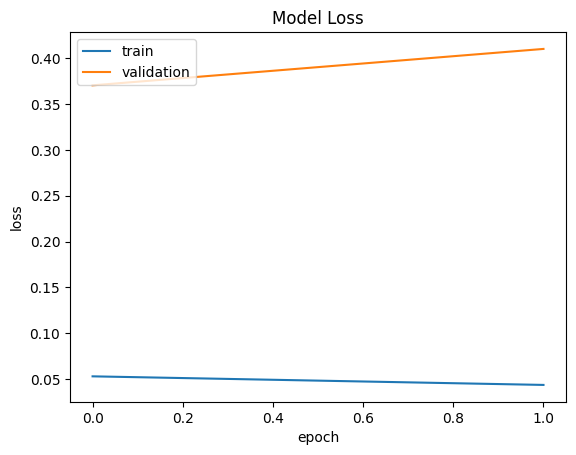

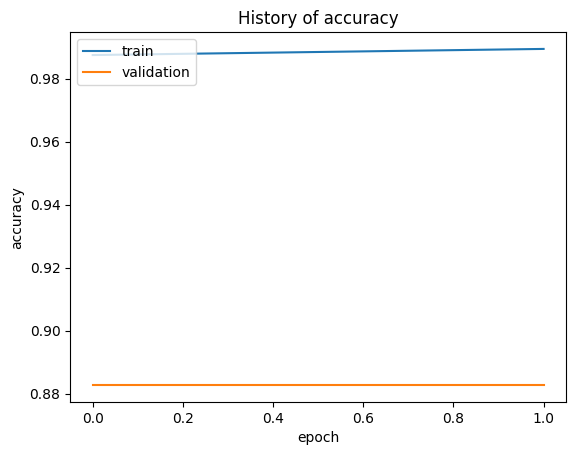

In [70]:
print(f"\nAfter fine-tuning:")
print(f"Final Validation Loss: {final_val_loss}")
print(f"Final Validation Accuracy: {final_val_accuracy}")

# Plot the training history
best_learner.plot('loss')
best_learner.plot('accuracy')

In [71]:
# Save model
best_learner.save_model("%s/distilbertmodel_best_learner")
best_learner.save_model('drive/MyDrive/Final/distilbertmodel_best_learner')

In [72]:
# Returns a Predictor instance that can be used to make predictions on unlabeled examples
predictor = ktrain.get_predictor(best_learner.model, preproc = preprocess)

In [73]:
# Save the predictor model
predictor.save("%s/distilbertmodel_predictor")
predictor.save('drive/MyDrive/Final/distilbertmodel_predictor')

## Model Validation

In [74]:
# Returns confusion matrix and optionally prints a classification report.
validation = best_learner.validate(val_data = val,
                              print_report = True)

401/401 [==============================] - 21s 53ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       0.99      0.99      0.99       201

    accuracy                           0.99       401
   macro avg       0.99      0.99      0.99       401
weighted avg       0.99      0.99      0.99       401



In [76]:
validation

array([[197,   3],
       [  3, 198]])

In [77]:
# Show the data stored in the validation
confusion_matrix = validation

print("Confusion Matrix:")
print(confusion_matrix)

# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix.ravel()

print(f"\nTrue Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"\nAccuracy: {accuracy:.4f}")

# Calculate precision
precision = TP / (TP + FP)
print(f"Precision: {precision:.4f}")

# Calculate recall (sensitivity)
recall = TP / (TP + FN)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_score:.4f}")

# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")

# Calculate false positive rate
fpr = FP / (FP + TN)
print(f"False Positive Rate (FPR): {fpr:.4f}")

# Calculate false negative rate
fnr = FN / (FN + TP)
print(f"False Negative Rate (FNR): {fnr:.4f}")

# Calculate false discovery rate
fdr = FP / (FP + TP)
print(f"False Discovery Rate (FDR): {fdr:.4f}")

# Calculate false omission rate
for_rate = FN / (FN + TN)
print(f"False Omission Rate (FOR): {for_rate:.4f}")


Confusion Matrix:
[[197   3]
 [  3 198]]

True Negatives (TN): 197
False Positives (FP): 3
False Negatives (FN): 3
True Positives (TP): 198

Accuracy: 0.9850
Precision: 0.9851
Recall (Sensitivity): 0.9851
F1 Score: 0.9851
Specificity: 0.9850
False Positive Rate (FPR): 0.0150
False Negative Rate (FNR): 0.0149
False Discovery Rate (FDR): 0.0149
False Omission Rate (FOR): 0.0150


## Analysis and Conclusion

The results of our DistilBERT-based model for health-related text classification demonstrate exceptional performance across all key metrics. Let's analyze these results in detail:

### Overall Accuracy
The model achieved an impressive accuracy of 98.50%, correctly classifying 395 out of 401 samples. This high accuracy indicates that the model is highly effective in distinguishing between health-related and non-health-related texts.

### Precision and Recall
Both precision and recall are consistently high at 98.51%. This balance suggests that the model is equally good at avoiding false positives and false negatives, which is crucial in health-related applications where both types of errors can have significant consequences.

### F1 Score
The F1 score of 98.51% further confirms the model's balanced performance, as it is the harmonic mean of precision and recall.

### Confusion Matrix
The confusion matrix shows a near-perfect distribution:
- **True Negatives (197)** and **True Positives (198)** are almost equal, indicating balanced class representation.
- **False Positives (3)** and **False Negatives (3)** are minimal and equally distributed, suggesting no bias towards either class.

### Error Rates
- **False Positive Rate (1.50%)** and **False Negative Rate (1.49%)** are very low and nearly identical.
- **False Discovery Rate (1.49%)** and **False Omission Rate (1.50%)** are also very low and balanced. These low error rates across different measures reinforce the model's reliability and lack of bias.

### Class-wise Performance
The classification report shows that the model performs slightly better for class 1 (likely health-related) with 99% precision and recall, compared to 98% for class 0 (likely non-health-related). However, this difference is minimal and may not be statistically significant given the sample size.

## Conclusion

Our DistilBERT-based model has demonstrated outstanding performance in classifying health-related texts. The high accuracy, precision, and recall, coupled with very low and balanced error rates, indicate that the model is not only highly accurate but also robust and unbiased in its predictions.

The balanced performance across both classes suggests that the model has successfully learned to distinguish health-related content from non-health-related content without favoring either category. This is particularly important in health applications where misclassifications in either direction could have serious implications.

The model's high performance also validates our approach of using a transformer-based architecture and our fine-tuning strategy. The success of DistilBERT in this task demonstrates the power of transfer learning in natural language processing, even with a compressed model.

While the results are excellent, there's always room for improvement and further investigation:
- Analyze the few misclassified samples to understand the types of texts that challenge the model.
- Test the model on a larger and more diverse dataset to ensure its generalizability.
- Consider fine-tuning for specific health subdomains if needed for particular applications.
- Explore ensemble methods or other advanced techniques to potentially squeeze out the last bit of performance.

In conclusion, this model shows great promise for real-world applications in categorizing health-related content. Its high accuracy and balanced performance make it a reliable tool for tasks such as content filtering, information retrieval, or assisting in health-related research and documentation.


### Using the model

In [78]:
# Using the model with sample data
content = ["5 Tips for a Healthier Lifestyle", "Political Turmoil in the Capital"]
preds = predictor.predict(content)
print(preds)

1/1 [==============================] - 0s 72ms/step
['is_health', 'not_is_health']
